# About this notebook

This notebook calculates a spectrum for a single photon energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Multiprocessing
import multiprocessing as mp
from multiprocessing import Pool

# For the progress bar
from ipywidgets import IntProgress
from IPython.display import display

# This package
import XNLdyn

%matplotlib notebook

In [51]:
## Set up the problem and modify the parameters a little
PAR = XNLdyn.XNLpars()
PAR.tdur_sig = [10,]
PAR.E_j = [852,]
PAR.Nsteps_z = 30

pulse_energy_max = 10e-6  # Joule

N_local_fluences_to_calculate = 30
N_pulse_energies = 10

Nsteps_r = 100

pulse_profile_sigma= 400 # nm rms

sim_options = dict(t_span=[-50, 50],method='RK45', rtol=1e-7, atol=1e-9, plot = False)

In [52]:
pulse_energy_max_photons = pulse_energy_max *  XNLdyn.photons_per_J(PAR.E_j[0])

## Run a simulation for a single Fluence

Initializing a simulation where ['I0'] are changed to [457801.2924001281]



<IPython.core.display.Javascript object>


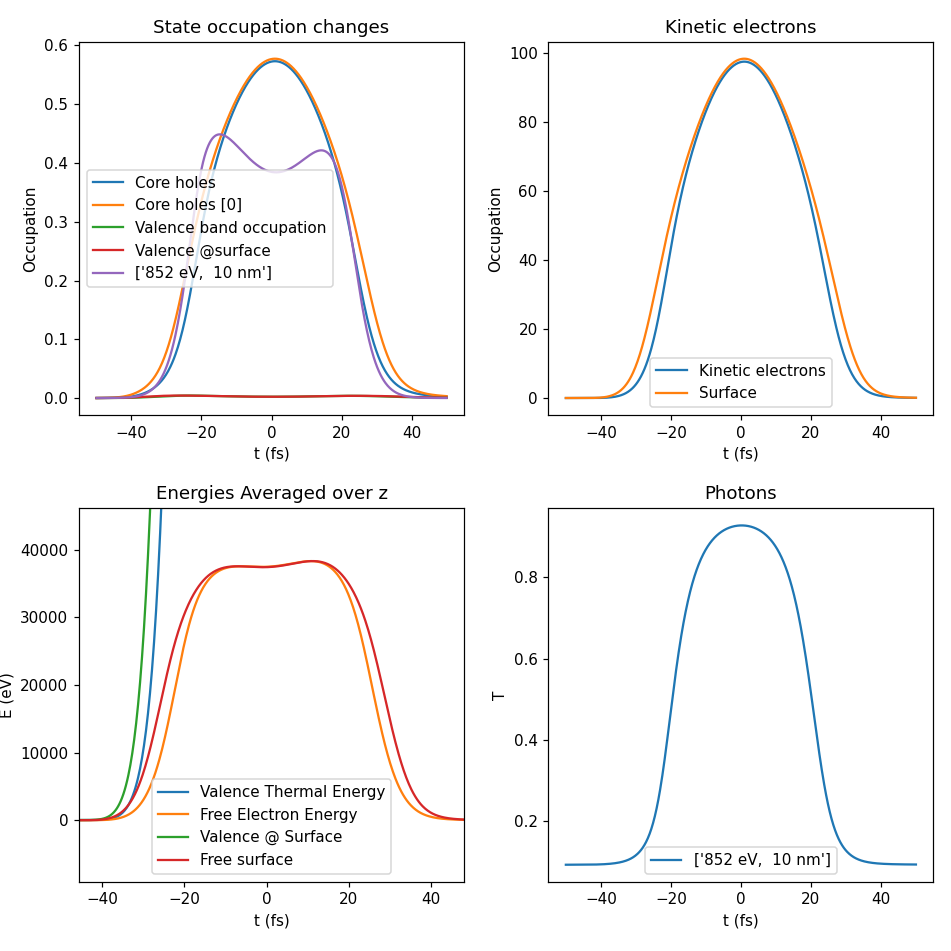

Transmission:  [84.78833045]  %
CPU times: user 29.2 s, sys: 176 ms, total: 29.4 s
Wall time: 29.2 s


(array([457804.14082671]), array([388164.48773118]))

In [58]:
%%time
fluences_joules_nm2, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_energy_max, pulse_profile_sigma) # These are just to get an idea where to calculate Fluences

fluences_simulated = np.logspace(np.log10(np.min(fluences_joules_nm2)),
                                 np.log10(np.max(fluences_joules_nm2)),
                                 N_local_fluences_to_calculate)

XNLdyn.run_modified_simulation(PAR, dict(t_span=[-50, 50],method='DOP853', rtol=1e-7, atol=1e-9, plot = True),
                               ['I0',] , [np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_j[0]),])

# Load a spectrum to simulate

<IPython.core.display.Javascript object>


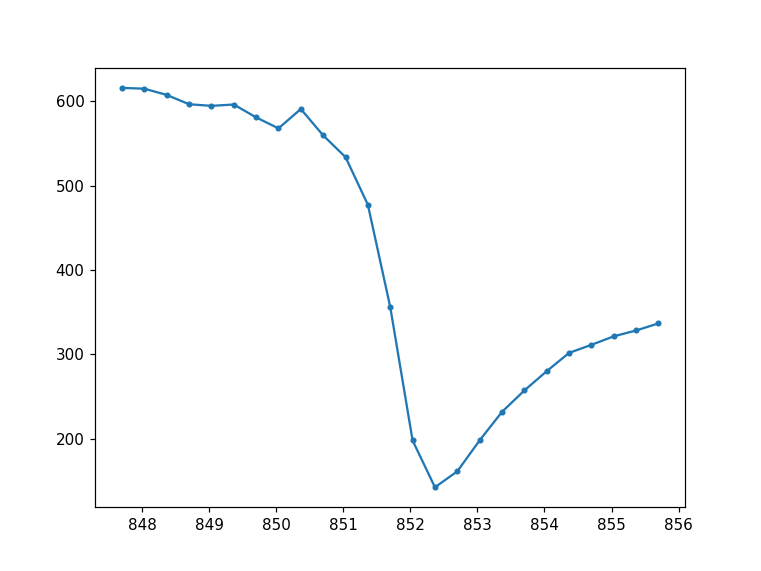

In [27]:

N_points_E = 25
E_fermi = 850.7#850.33
Erange = 3
E_min, E_max = E_fermi-Erange, E_fermi+Erange
enax_abs = np.linspace(E_min, E_max+2, N_points_E) # Absolute energy axis to sample
enax_rel = enax_abs-E_fermi # Rélative energy axis to Fermi Energy, i.e. detuning

ld = np.load('../../Penetration_depth_cold_spectrum.npz', allow_pickle=True)
pendepths = np.interp(enax_abs, ld['enax'],ld['spectrum'])

plt.figure()
plt.plot(enax_abs, pendepths,'.-')


## Run it for all the fluences in the spot

In [28]:
%%time
print(f'I will run {N_points_E*N_local_fluences_to_calculate:.0f} Simualtions')

progressbar = IntProgress(min=0, max=N_points_E*N_local_fluences_to_calculate) # instantiate the bar
display(progressbar) # display the bar

try:
    mp.set_start_method('fork')  # 'spawn' on windows, "fork" or "forkserver" on unix machines
except RuntimeError:
    pass
with Pool(processes=50) as pool:
    tasklist = {}
    for photon_energy, pendepdth in zip(enax_abs, pendepths):
        for fluence in fluences_simulated:
            progressbar.value += 1
            fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
            tasklist[(photon_energy,fluence)]=\
                pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,
                                            ['I0','E_j', 'lambda_res_Ej'] ,
                                            [(fluence_photons,),(photon_energy,),(pendepdth,)]),)
                                             )


    #tasklist = [pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,  ['I0',] , [fluence,]),)
    #                                     ) for fluence in fluences_simulated]
    resultdict = {key: tasklist[key].get(timeout=70) for key in tasklist}


I will run 750 Simualtions


IntProgress(value=0, max=750)

Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(3.753775314821598,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(2.470241894195617,), (847.7,), (615.9438308554943,)]


Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(5.70423048336826,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(8.668138787878972,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(20.016283273337805,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(13.172088726955666,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(30.41670948196699,), (847.7,), (615.9438308554943,)]
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are

Transmission:  [96.16071313]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(863.8344897477737,), (848.7,), (596.5646553849812,)]

Transmission:  [96.03098085]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1312.681398257392,), (848.7,), (596.5646553849812,)]

Transmission:  [96.20768869]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1994.7483849992188,), (848.7,), (596.5646553849812,)]

Transmission:  [96.02979644]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(3031.2161997108974,), (848.7,), (596.5646553849812,)]

Transmission:  [96.37848529]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(4606.230900341573,), (848.7,), (596.5646553849812,)]

Transmission:  [96.276997]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(6999.620518419298,), (848.7,), (596.5646553849812,)]

Tran


Transmission:  [95.97206803]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(5.6930373777535515,), (849.3666666666667,), (596.2282749547259,)]

Transmission:  [96.0040741]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(8.651129763924107,), (849.3666666666667,), (596.2282749547259,)]

Transmission:  [96.09837448]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(13.146241843538698,), (849.3666666666667,), (596.2282749547259,)]

Transmission:  [95.99563671]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(19.977006393950543,), (849.3666666666667,), (596.2282749547259,)]

Transmission:  [96.24603977]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(30.357024403904973,), (849.3666666666667,), (596.2282749547259,)]

Transmission:  [96.17691355]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed


Transmission:  [96.65642843]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(10624.093168786285,), (849.7,), (580.9796048868742,)]

Transmission:  [96.00125968]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(16144.353625069098,), (849.7,), (580.9796048868742,)]

Transmission:  [95.99060843]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(24532.93187761632,), (849.7,), (580.9796048868742,)]

Transmission:  [95.92541861]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(37280.20089805156,), (849.7,), (580.9796048868742,)]

Transmission:  [96.01652215]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(56650.92887928086,), (849.7,), (580.9796048868742,)]

Transmission:  [95.98901542]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(86086.65365462321,), (849.7,), (580.9796048868742,)]

T


Transmission:  [96.14073193]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(46.07623408516523,), (850.3666666666667,), (590.9036045430806,)]

Transmission:  [95.82498568]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(70.01736571436278,), (850.3666666666667,), (590.9036045430806,)]

Transmission:  [95.82130999]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(106.39826797731328,), (850.3666666666667,), (590.9036045430806,)]

Transmission:  [96.31504759]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(161.6826242043258,), (850.3666666666667,), (590.9036045430806,)]

Transmission:  [95.91428824]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(245.69263641745752,), (850.3666666666667,), (590.9036045430806,)]

Transmission:  [95.81631681]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed 


Transmission:  [95.98736799]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(85985.45857568279,), (850.7,), (559.6237034160818,)]

Transmission:  [95.77356263]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(130663.35430284512,), (850.7,), (559.6237034160818,)]

Transmission:  [95.77351805]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(198555.8074641607,), (850.7,), (559.6237034160818,)]

Transmission:  [95.77362893]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(301725.0619968694,), (850.7,), (559.6237034160818,)]

Transmission:  [95.98917052]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(458500.88294922834,), (850.7,), (559.6237034160818,)]

Transmission:  [95.92885712]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(2.460566433406006,), (851.0333333333334,), (533.8544205


Transmission:  [95.79295137]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(372.9155708115763,), (851.3666666666667,), (477.33972701219676,)]

Transmission:  [95.79916479]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(566.6818571550963,), (851.3666666666667,), (477.33972701219676,)]

Transmission:  [95.58661618]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(861.1287711314384,), (851.3666666666667,), (477.33972701219676,)]

Transmission:  [96.32090513]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1308.5697929224173,), (851.3666666666667,), (477.33972701219676,)]

Transmission:  [95.80769628]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1988.500396635414,), (851.3666666666667,), (477.33972701219676,)]

Transmission:  [95.58825725]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are chan


Transmission:  [95.6570969]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(2.4576785576185882,), (852.0333333333334,), (197.99892563876352,)]

Transmission:  [93.44821825]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(3.734684090263607,), (852.0333333333334,), (197.99892563876352,)]

Transmission:  [95.107043]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(5.675219491511999,), (852.0333333333334,), (197.99892563876352,)]

Transmission:  [95.11222937]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(8.624053734773684,), (852.0333333333334,), (197.99892563876352,)]

Transmission:  [93.45501775]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(13.105097156418353,), (852.0333333333334,), (197.99892563876352,)]

Transmission:  [95.87539367]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are change

 
[93.55818795]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1986.1674799759535,), (852.3666666666667,), (142.50982673660587,)]

Transmission:  [88.64778545]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(3018.1766712619433,), (852.3666666666667,), (142.50982673660587,)]

Transmission:  [93.61391753]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(4586.416055437675,), (852.3666666666667,), (142.50982673660587,)]

Transmission:  [88.65496712]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(6969.509914335526,), (852.3666666666667,), (142.50982673660587,)]

Transmission:  [93.58110956]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(10590.855225275944,), (852.3666666666667,), (142.50982673660587,)]

Transmission:  [93.73090905]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(160


Transmission:  [86.28215446]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(13.089734219655721,), (853.0333333333334,), (198.14918608982077,)]

Transmission:  [86.22114156]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(19.891137506320728,), (853.0333333333334,), (198.14918608982077,)]

Transmission:  [84.69204669]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(30.22653819061008,), (853.0333333333334,), (198.14918608982077,)]

Transmission:  [86.30118113]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(45.93219521498379,), (853.0333333333334,), (198.14918608982077,)]

Transmission:  [90.45433651]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(69.79848449607711,), (853.0333333333334,), (198.14918608982077,)]

Transmission:  [91.1780371]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are chan


Transmission:  [88.76564675]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(10578.444551600765,), (853.3666666666667,), (231.88348191869187,)]

Transmission:  [86.75262862]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(16074.986065256686,), (853.3666666666667,), (231.88348191869187,)]

Transmission:  [90.11915896]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(24427.521053565004,), (853.3666666666667,), (231.88348191869187,)]

Transmission:  [86.93170108]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(37120.01879193127,), (853.3666666666667,), (231.88348191869187,)]

Transmission:  [90.11042828]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(56407.5164275516,), (853.3666666666667,), (231.88348191869187,)]

Transmission:  [90.13531409]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are cha


Transmission:  [90.39440584]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(69.71675643960458,), (854.0333333333334,), (280.10931209263316,)]

Transmission:  [93.87640082]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(105.94146264272428,), (854.0333333333334,), (280.10931209263316,)]

Transmission:  [91.2370327]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(160.98846360706278,), (854.0333333333334,), (280.10931209263316,)]

Transmission:  [90.58995807]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(244.63779117309076,), (854.0333333333334,), (280.10931209263316,)]

Transmission:  [91.24997299]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(371.75116482957213,), (854.0333333333334,), (280.10931209263316,)]

Transmission:  [90.45451285]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are ch


Transmission:  [92.3099338]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(56341.49381849122,), (854.3666666666667,), (301.7977426130176,)]

Transmission:  [91.98674172]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(85616.4366708283,), (854.3666666666667,), (301.7977426130176,)]

Transmission:  [92.31614365]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(130102.58925375172,), (854.3666666666667,), (301.7977426130176,)]

Transmission:  [92.32829315]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(197703.66986433792,), (854.3666666666667,), (301.7977426130176,)]

Transmission:  [91.99547857]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(300430.1551723344,), (854.3666666666667,), (301.7977426130176,)]

Transmission:  [91.88137584]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to


Transmission:  [92.76620841]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(371.3163850960379,), (855.0333333333334,), (321.4696805255978,)]

Transmission:  [92.61015711]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(564.2517373045226,), (855.0333333333334,), (321.4696805255978,)]

Transmission:  [93.56390199]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(857.4359652047897,), (855.0333333333334,), (321.4696805255978,)]

Transmission:  [92.77772903]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1302.9582114159857,), (855.0333333333334,), (321.4696805255978,)]

Transmission:  [92.63475317]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(1979.9730470728275,), (855.0333333333334,), (321.4696805255978,)]

Transmission:  [94.16737799]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed 


Transmission:  [93.13431602]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(300078.92549869855,), (855.3666666666667,), (328.36928420396083,)]

Transmission:  [92.95180449]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(455999.4167704787,), (855.3666666666667,), (328.36928420396083,)]

Transmission:  [92.98722775]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(2.4471474274975162,), (855.7,), (336.7723912780126,)]

Transmission:  [93.04772413]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(3.7186810031252415,), (855.7,), (336.7723912780126,)]

Transmission:  [93.28630407]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(5.650901227943526,), (855.7,), (336.7723912780126,)]

Transmission:  [93.05740473]  %
Initializing a simulation where ['I0', 'E_j', 'lambda_res_Ej'] are changed to [(8.587099743467343,), (855.7,

## Assemble the results into a Matrix

In [29]:
fl_dep_spectrum_I = np.zeros((N_points_E,N_local_fluences_to_calculate))
fl_dep_spectrum_T = np.zeros((N_points_E,N_local_fluences_to_calculate))

for i_photen in range(N_points_E):
    for i_pulseen in range(N_local_fluences_to_calculate):
        fl_dep_spectrum_I[i_photen, i_pulseen], fl_dep_spectrum_T[i_photen, i_pulseen]  = \
            resultdict[(enax_abs[i_photen],fluences_simulated[i_pulseen])]


<IPython.core.display.Javascript object>


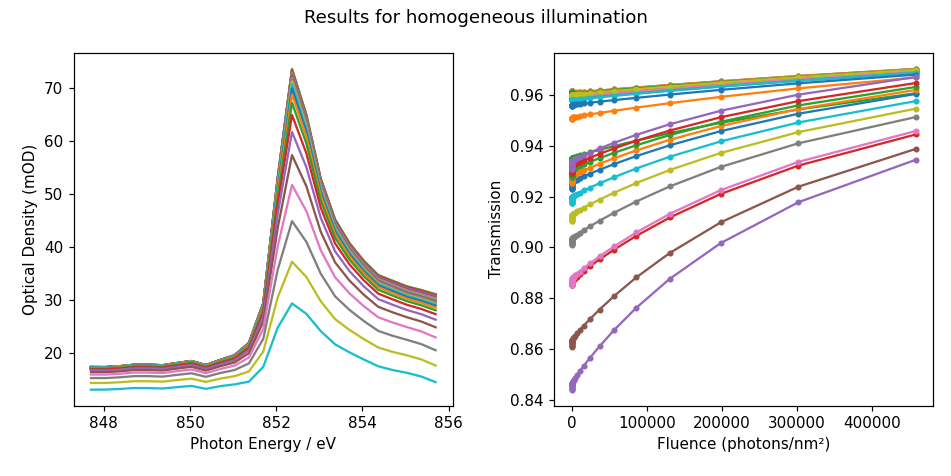

In [56]:
T = fl_dep_spectrum_T/fl_dep_spectrum_I

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for homogeneous illumination')
ax1.plot(enax_abs,1e3*np.log10(1/T))
ax1.set_ylabel('Optical Density (mOD)')
ax1.set_xlabel('Photon Energy / eV')

plt.sca(ax2)
plt.plot(fluences_simulated*XNLdyn.photons_per_J(850), T[:,:].T, '.-')#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm²)')
plt.ylabel('Transmission')
#plt.xscale('log')
#plt.legend(loc = 'lower right')

plt.tight_layout()


<IPython.core.display.Javascript object>


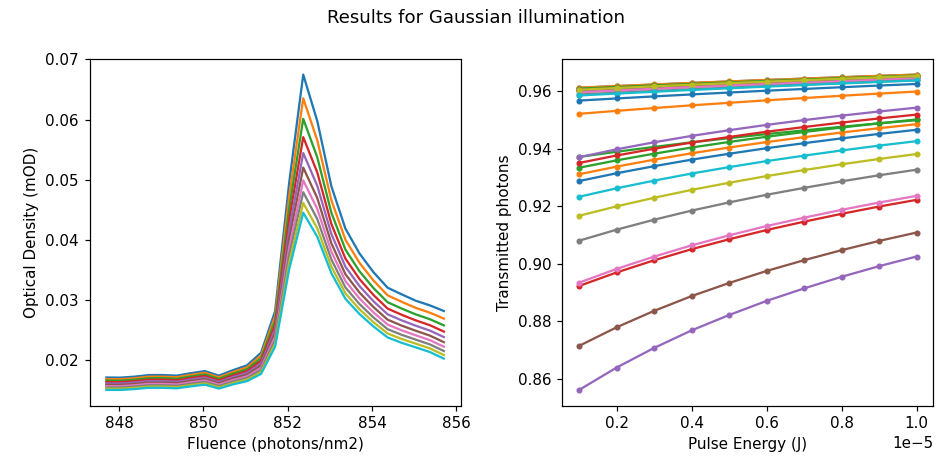

In [57]:
# These are the pulse energies for which we evaluate stuff
final_pulse_energies = np.linspace(1/N_pulse_energies, 1, N_pulse_energies)* pulse_energy_max

final_transmissions = np.zeros((N_points_E, N_pulse_energies))
final_incidence_check = np.zeros((N_points_E, N_pulse_energies))
for i_photen in range(N_points_E):

    for ipe, pulse_en in enumerate(final_pulse_energies*XNLdyn.photons_per_J(enax_abs[i_photen])):
        local_fluences, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_en, pulse_profile_sigma)
        
        
        local_transmitted = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                      fl_dep_spectrum_T[i_photen,:])# tr[:, 0]
        final_transmissions[i_photen,ipe] = np.sum(local_transmitted*dA)

        
        local_incidence_check = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                          fl_dep_spectrum_I[i_photen,:])

        final_incidence_check[i_photen,ipe] = np.sum(local_incidence_check*dA) # should result equal final_pulse_energies

        
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for Gaussian illumination')

plt.sca(ax1)
plt.plot(enax_abs,np.log10(final_incidence_check/final_transmissions) )#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm2)')
plt.ylabel('Optical Density (mOD)')

plt.sca(ax2)
plt.plot(final_pulse_energies, (final_transmissions/final_incidence_check).T, '.-')

plt.xlabel('Pulse Energy (J)')
plt.ylabel('Transmitted photons')
#plt.legend(loc = 'lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


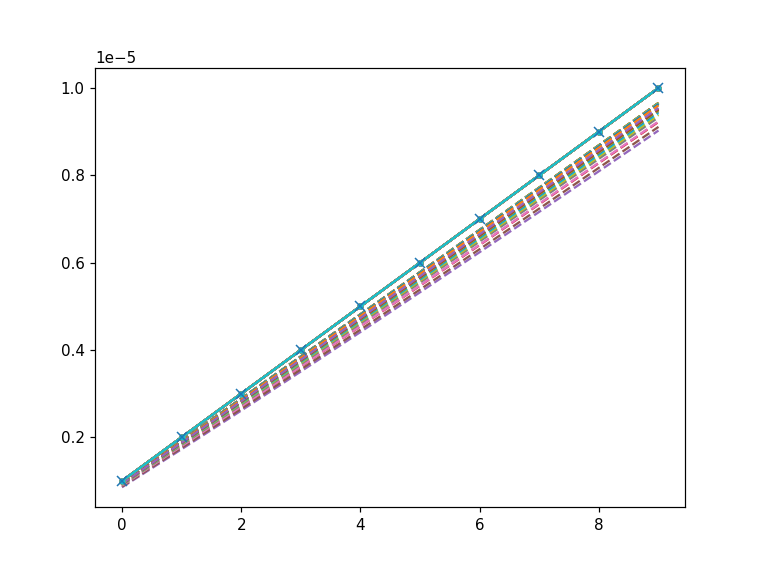

In [59]:
plt.figure()
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_transmissions.T,'--')
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_incidence_check.T,'.-')
plt.plot(final_pulse_energies,'x')

NameError: name 'sim' is not defined